## 3. Linear Regression

Using CPI as an indicator of an inflationary environment, we used linear regression analysis to evaluate the suitability of each factor in predicting the likelihood of inflation. As our datasets all contain time-series data, we believe that it is appropriate to begin with linear regression to evaluate the factors we have identified.

In [ ]:
# Import essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sb
from datetime import datetime
!pip install openpyxl

# Import linear regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

     |████████████████████████████████| 242 kB 30.2 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# This function cleans a dataframe to change datetime to %Y-%m format
def df_dates_monthly(df, Date = 'Date'):
    clean_df = df.copy()
    clean_df[Date] = pd.to_datetime(clean_df[Date])
    clean_df[Date] = clean_df[Date].dt.strftime('%Y-%m')
    return clean_df

### Predicting CPI using US Unemployment Rate

In [ ]:
# Clean CPI data to have date in %Y-%m format
cpi_data = pd.read_csv("cpi_monthly_data.csv")
cpi_data_clean = df_dates_monthly(cpi_data)

In [ ]:
# Clean CPI data to have same time period as Unemployment Rate data
cpi_data_clean = cpi_data_clean[(cpi_data_clean.Date>='1948-01') & (cpi_data_clean.Date<='2021-11')]

In [ ]:
cpi_data_clean.shape

(887, 2)

In [ ]:
unemp_data = pd.read_csv("unemployment_rate_data.csv")

# Clean unemployment data to have date in %Y-%m format
unemp_data.rename({"date": "Date","unrate": "Rate"},axis=1,inplace=True)
unemp_data = df_dates_monthly(unemp_data)

# Clean unemployment data to keep columns Date and unemployment rate
unemp_data_clean = pd.DataFrame(unemp_data[['Date','Rate']])

In [ ]:
unemp_data_clean.shape

(887, 2)

In [ ]:
# Create new dateframes for reference
unemp = pd.DataFrame(unemp_data_clean[['Rate']])
cpi = pd.DataFrame(cpi_data_clean[['Value']])

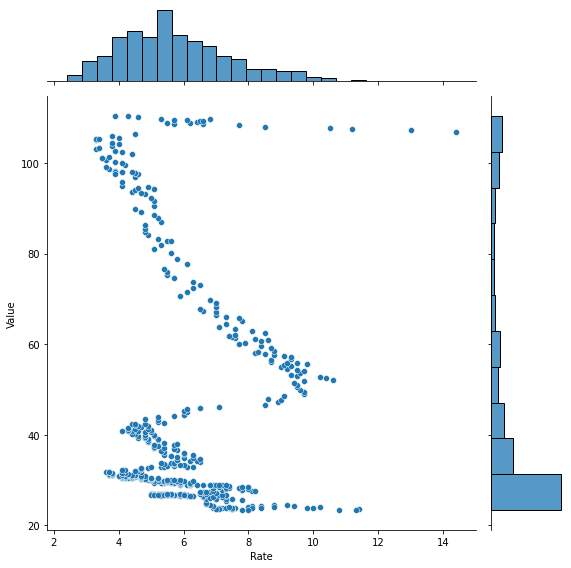

In [ ]:
# Visualise relationship between CPI and Unemployment rate data
cpi_unemp_data = pd.concat([unemp,cpi], axis=1).reindex(unemp.index)
sb.jointplot(data=cpi_unemp_data, x='Rate', y='Value', height = 8)

#### Preparing train and test datasets
> Total data points: 887 values  
> Train set: 710 values (80% of total size)  
> Test set: 177 values (20% of total size)

In [ ]:
# Preparation of train and test datasets
unemp_train, unemp_test, cpi_train, cpi_test = train_test_split(unemp,cpi,test_size=177)

In [ ]:
# Linear regression model on train set
linreg_unemp = LinearRegression()
linreg_unemp.fit(unemp_train,cpi_train)

LinearRegression()

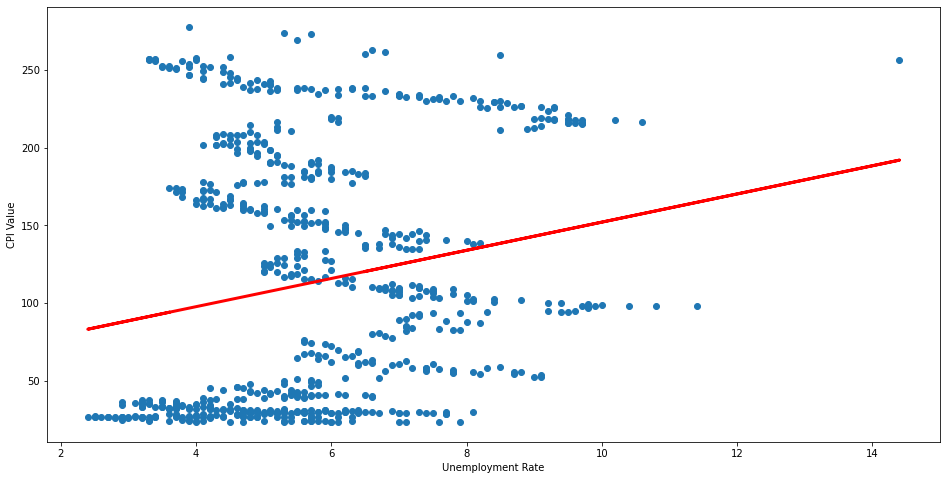

In [ ]:
# Plot regression line
regline_x = unemp_train
regline_y = linreg_unemp.intercept_ + linreg_unemp.coef_*unemp_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(unemp_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("Unemployment Rate")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_unemp = round(linreg_unemp.score(unemp_train,cpi_train),2)

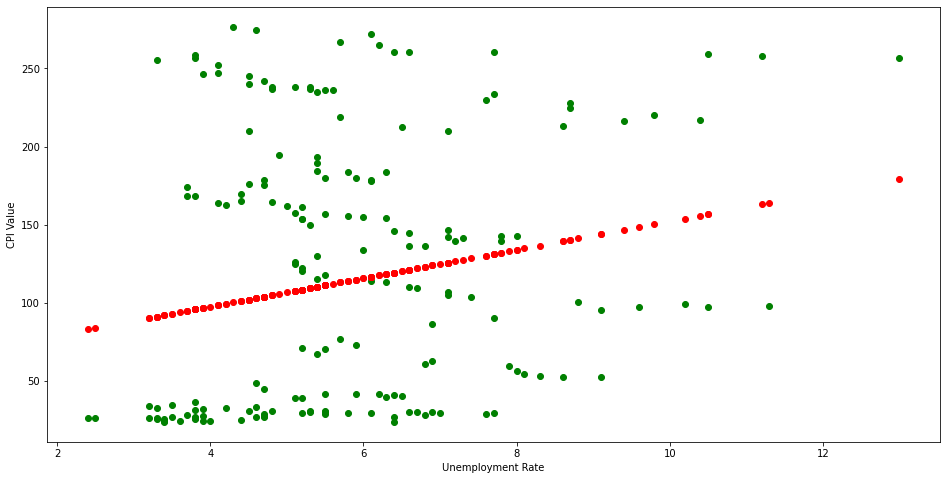

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_unemp.predict(unemp_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(unemp_test, cpi_test, color='green')
plt.scatter(unemp_test, cpi_test_pred, color='red')
plt.xlabel("Unemployment Rate")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_unemp = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Predicting CPI using S&P 500 data

In [ ]:
sp_data = pd.read_csv("sp500_monthly_data.csv")

# Clean S&P data to have date in %Y-%m format
sp_data['Date'] = pd.to_datetime(sp_data['Date'], format='%b %y')
sp_data = df_dates_monthly(sp_data)

# Clean S&P data to keep only Date and Change % columns, sorted in ascending order of date
sp_data_clean = pd.DataFrame(sp_data[['Date','Price']])
sp_data_clean['Price'] = sp_data_clean['Price'].str.replace(',', '').astype(float)
sp_data_clean.sort_values(by=['Date'], inplace=True)

# Clean S&P data to have same time period as CPI data
sp_data_clean = sp_data_clean[(sp_data_clean.Date<='2022-03')]
sp_data_clean.set_index('Date', inplace=True)

In [ ]:
# Clean CPI data to have date in %Y-%m format
cpi_data = pd.read_csv("cpi_monthly_data.csv")
cpi_data_clean = df_dates_monthly(cpi_data)

# Clean CPI data to have same time period as Unemployment Rate data
cpi_data_clean = cpi_data_clean[(cpi_data_clean.Date>='1970-02')]
cpi_data_clean.set_index('Date', inplace=True)

In [ ]:
sp_data_clean.shape

(626, 1)

In [ ]:
sp_data_clean.head()

,Price
Date,
1970-02,89.50
1970-03,89.63
1970-04,81.52
1970-05,76.55
1970-06,72.72


In [ ]:
cpi_data_clean.shape

(626, 1)

In [ ]:
cpi_data_clean.head()

,Value
Date,
1970-02,38.0
1970-03,38.2
1970-04,38.5
1970-05,38.6
1970-06,38.8


In [ ]:
# Create new dataframes for reference
sp = pd.DataFrame(sp_data_clean[['Price']])
cpi = pd.DataFrame(cpi_data_clean[['Value']])

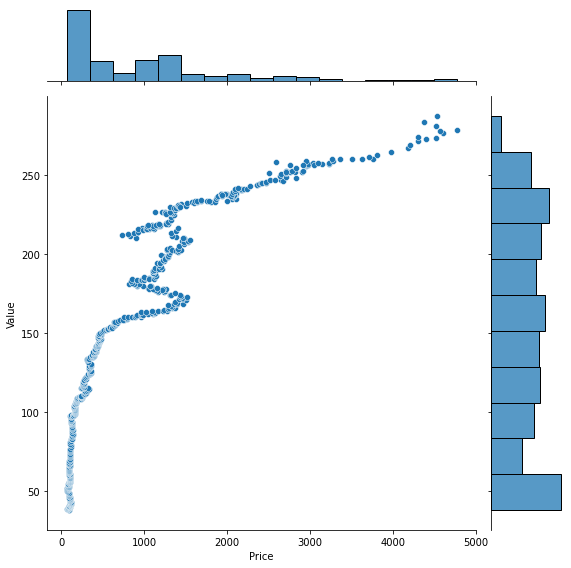

In [ ]:
# Visualise relationship between CPI and Unemployment rate data
cpi_sp_data = pd.concat([sp,cpi], axis=1).reindex(sp.index)

sb.jointplot(data=cpi_sp_data, x='Price', y='Value', height = 8)

#### Preparing train and test sets
> Total size: 626 values  
> Train set: 500 values  
> Test set: 126 values

In [ ]:
# Preparation of train and test datasets
sp_train, sp_test, cpi_train, cpi_test = train_test_split(sp,cpi,test_size=126)

In [ ]:
# Linear regression model on train set
linreg_sp = LinearRegression()
linreg_sp.fit(sp_train,cpi_train)

LinearRegression()

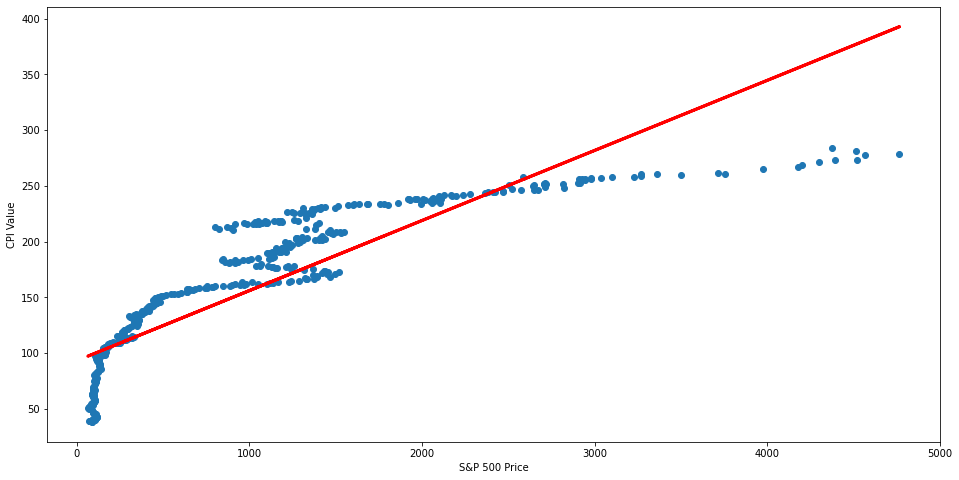

In [ ]:
# Plot regression line
regline_x = sp_train
regline_y = linreg_sp.intercept_ + linreg_sp.coef_ * sp_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(sp_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("S&P 500 Price")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_sp = round(linreg_sp.score(sp_train,cpi_train),2)

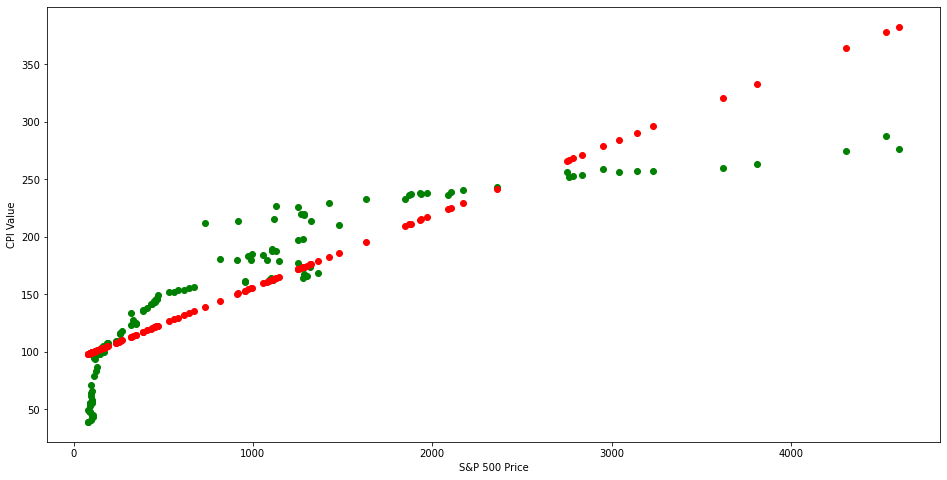

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_sp.predict(sp_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(sp_test, cpi_test, color='green')
plt.scatter(sp_test, cpi_test_pred, color='red')
plt.xlabel("S&P 500 Price")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_sp = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Predicting CPI using inflation expectations data

In [ ]:
# Import BIE data
BIE_pd = pd.read_excel("FedBankOfAtlantaBIE.xlsx")
BIE_pd.columns = ['Date', 'AvgUnitCostChange']

# Since this data looks ahead 1 year at inflation, we need to bring the dates forward by 1 year as well
BIE_pd['Date'] = BIE_pd['Date'] + pd.DateOffset(months=12)

# Clean BIE data to have date in %Y-%m format and round AvgUnitCostChange
BIE_pd['AvgUnitCostChange'] = round(BIE_pd['AvgUnitCostChange'],6)
BIE_clean = df_dates_monthly(BIE_pd)

# Clean BIE data to have same time period as CPI data
BIE_clean = BIE_clean[(BIE_clean.Date<='2023-03')]

In [ ]:
# Clean CPI data to have date in %Y-%m format
cpi_data = pd.read_csv("cpi_monthly_data.csv")
cpi_data_clean = df_dates_monthly(cpi_data)

# Clean CPI data to have same time period as Unemployment Rate data
cpi_data_clean = cpi_data_clean[(cpi_data_clean.Date>='2011-10') & (cpi_data_clean.Date<='2022-04')]


In [ ]:
BIE_clean.shape

(126, 2)

In [ ]:
cpi_data_clean.shape

(126, 2)

In [ ]:
# Create new dataframes for reference
bie = pd.DataFrame(BIE_clean[['AvgUnitCostChange']])
cpi = pd.DataFrame(cpi_data_clean[['Value']])
cpi = cpi.reset_index(drop=True)

In [ ]:
bie.head()

,AvgUnitCostChange
0,0.019269
1,0.020115
2,0.018592
3,0.018283
4,0.018718


In [ ]:
cpi.head()

,Value
0,226.421
1,226.230
2,225.672
3,226.665
4,227.663


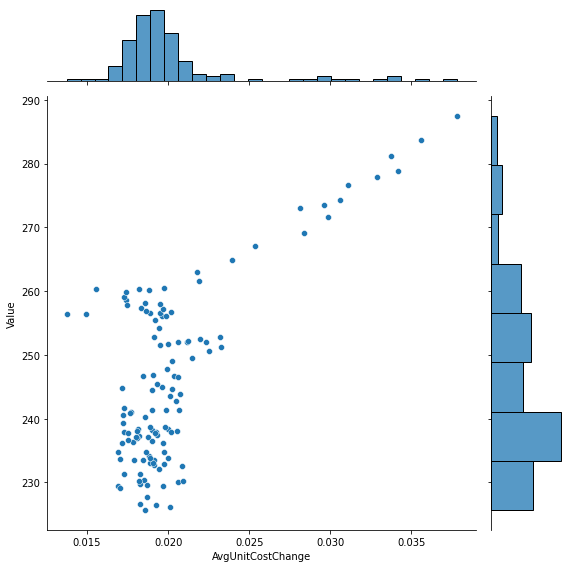

In [ ]:
# Visualise relationship between CPI and Unemployment rate data
cpi_bie_data = pd.merge(bie,cpi,left_index=True,right_index=True)
sb.jointplot(data=cpi_bie_data, x='AvgUnitCostChange', y='Value', height = 8)

#### Preparing train and test datasets
> Total size: 126 values  
> Train set: 100 values  
> Test set: 26 values

In [ ]:
# Preparation of train and test datasets
bie_train, bie_test, cpi_train, cpi_test = train_test_split(bie,cpi,test_size=26)

In [ ]:
# Linear regression model on train set
linreg_bie = LinearRegression()
linreg_bie.fit(bie_train,cpi_train)

LinearRegression()

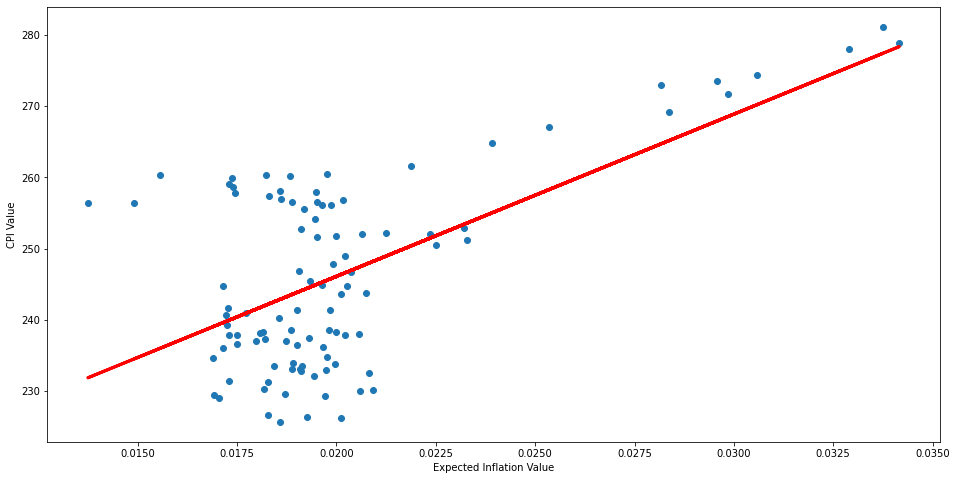

In [ ]:
# Plot regression line
regline_x = bie_train
regline_y = linreg_bie.intercept_ + linreg_bie.coef_ * bie_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(bie_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("Expected Inflation Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_bie = round(linreg_bie.score(bie_train,cpi_train),2)

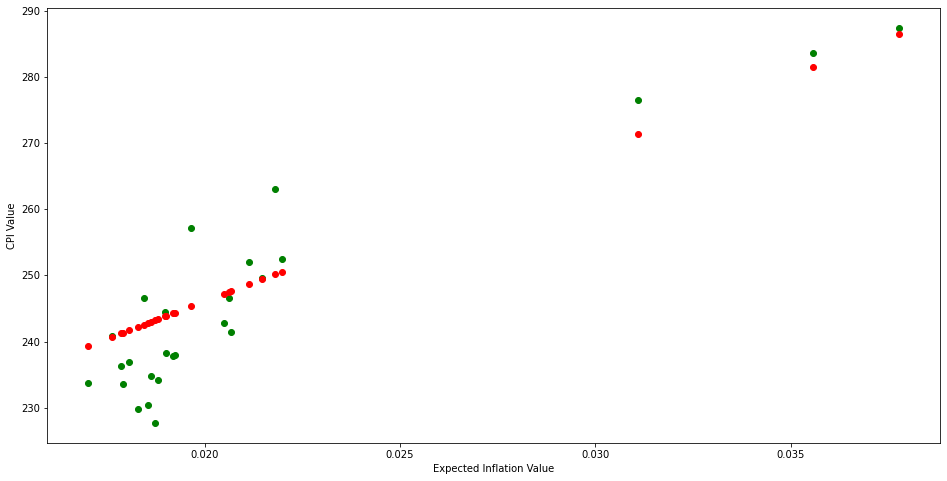

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_bie.predict(bie_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(bie_test, cpi_test, color='green')
plt.scatter(bie_test, cpi_test_pred, color='red')
plt.xlabel("Expected Inflation Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_bie = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Predicting CPI using oil price data

In [ ]:
# Import oil price data and see the head
oil_data = pd.read_csv("crude-oil-price.csv")

# Clean oil price data to have date in %Y-%m format and round percentChange
oil_data['percentChange'] = round(oil_data['percentChange'],6)
oil_data_clean = df_dates_monthly(oil_data,'date')

In [ ]:
# Clean CPI data to have date in %Y-%m format
cpi_data = pd.read_csv("cpi_monthly_data.csv")
cpi_data_clean = df_dates_monthly(cpi_data)

# Clean CPI data to have same time period as oil data
cpi_data_clean = cpi_data_clean[(cpi_data_clean.Date>='1983-03')]

In [ ]:
oil_data_clean.shape

(469, 4)

In [ ]:
cpi_data_clean.shape

(469, 2)

In [ ]:
# Create new dataframes for reference
oil = pd.DataFrame(oil_data_clean[['price']])
cpi = pd.DataFrame(cpi_data_clean[['Value']])
cpi = cpi.reset_index(drop=True)

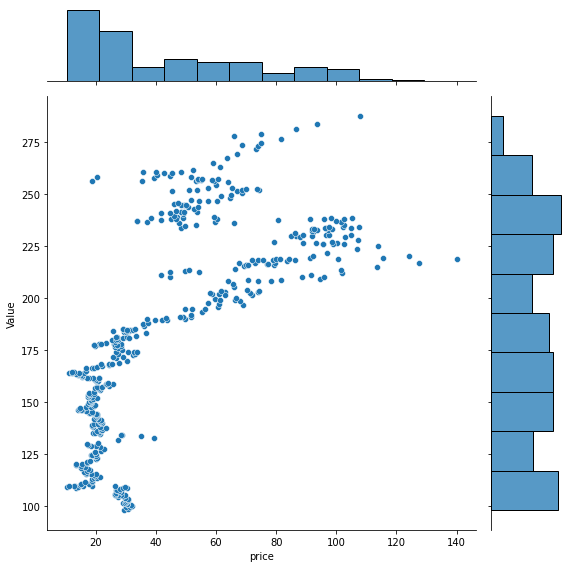

In [ ]:
# Visualise relationship between CPI and Unemployment rate data
cpi_oil_data = pd.merge(oil,cpi,left_index=True,right_index=True)
sb.jointplot(data=cpi_oil_data, x='price', y='Value', height = 8)

#### Preparing train and test datasets
> Total size: 469 values  
> Train set: 375 values  
> Test set: 94 values

In [ ]:
# Preparation of train and test datasets
oil_train, oil_test, cpi_train, cpi_test = train_test_split(oil,cpi,test_size=94)

In [ ]:
# Linear regression model on train set
linreg_oil = LinearRegression()
linreg_oil.fit(oil_train,cpi_train)

LinearRegression()

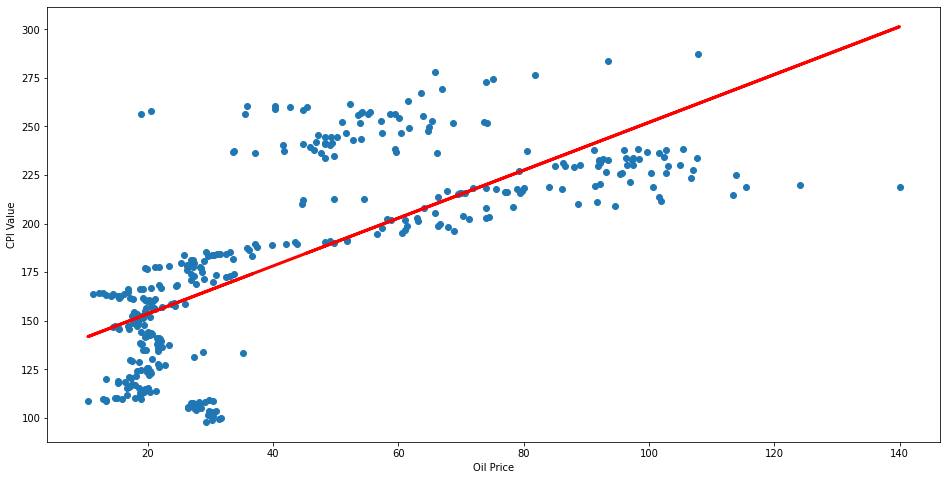

In [ ]:
# Plot regression line
regline_x = oil_train
regline_y = linreg_oil.intercept_ + linreg_oil.coef_ * oil_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(oil_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("Oil Price")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_oil = round(linreg_oil.score(oil_train,cpi_train),2)

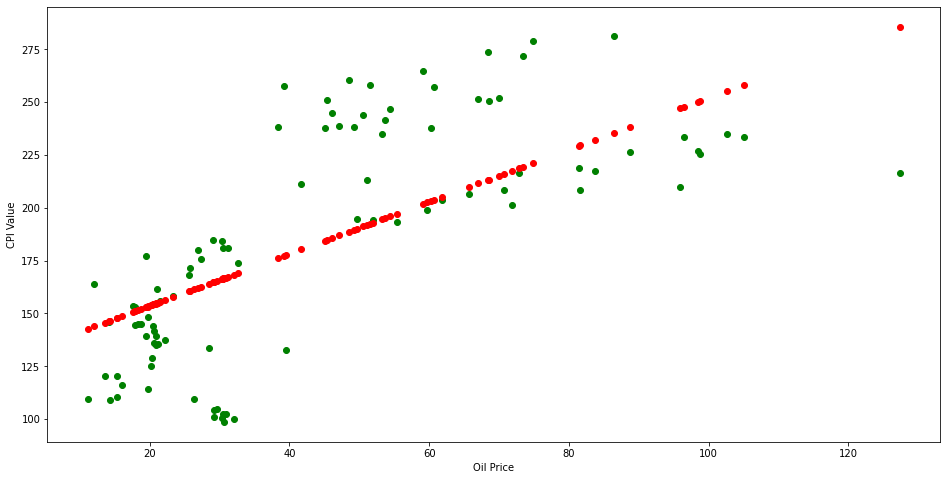

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_oil.predict(oil_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(oil_test, cpi_test, color='green')
plt.scatter(oil_test, cpi_test_pred, color='red')
plt.xlabel("Oil Price")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_oil = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Predicting CPI using Bitcoin price

In [ ]:
# Import bitcoin data and see the head
bitcoin_data = pd.read_csv("bitcoin_monthly_data.csv")

# Clean bitcoin data to have date in %Y-%m format
bitcoin_data = df_dates_monthly(bitcoin_data)
# Clean bitcoin data to where price is now the average between the high and low prices for the month
bitcoin_data['Price'] = (bitcoin_data['High'] + bitcoin_data['Low']) / 2
bitcoin_data_clean = bitcoin_data[['Date','Price']]

# Clean Bitcon data to have same time period as CPI data
bitcoin_data_clean = bitcoin_data_clean[(bitcoin_data_clean.Date<='2022-03')]

In [ ]:
# Clean CPI data to have date in %Y-%m format
cpi_data = pd.read_csv("cpi_monthly_data.csv")
cpi_data_clean = df_dates_monthly(cpi_data)

# Clean CPI data to have same time period as bitcoin data
cpi_data_clean = cpi_data_clean[(cpi_data_clean.Date>='2014-10')]

In [ ]:
bitcoin_data_clean.shape

(90, 2)

In [ ]:
cpi_data_clean.shape

(90, 2)

In [ ]:
# Create new dataframes for reference
bitcoin = pd.DataFrame(bitcoin_data_clean[['Price']])
cpi = pd.DataFrame(cpi_data_clean[['Value']])
cpi = cpi.reset_index(drop=True)
bitcoin = bitcoin.reset_index(drop=True)


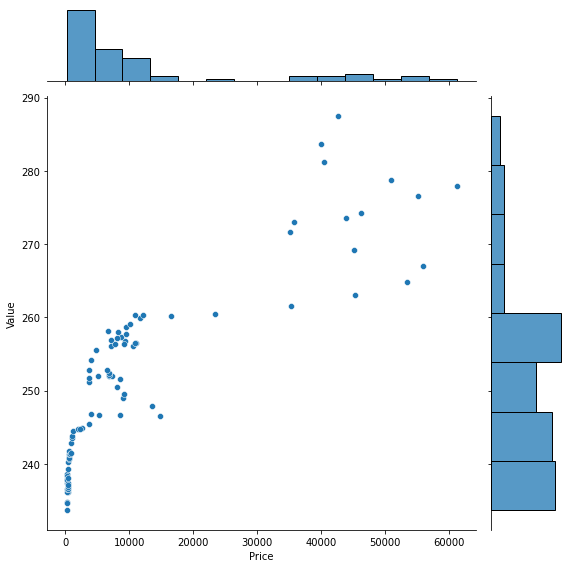

In [ ]:
# Visualise relationship between CPI and Unemployment rate data
cpi_bitcoin_data = pd.merge(bitcoin,cpi,left_index=True,right_index=True)
sb.jointplot(data=cpi_bitcoin_data, x='Price', y='Value', height = 8)

#### Preparing train and test datasets
> Total size: 90 values  
> Train set: 72 values  
> Test set: 18 values

In [ ]:
# Preparation of train and test datasets
bitcoin_train, bitcoin_test, cpi_train, cpi_test = train_test_split(bitcoin,cpi,test_size=18)

In [ ]:
# Linear regression model on train set
linreg_bitcoin = LinearRegression()
linreg_bitcoin.fit(bitcoin_train,cpi_train)

LinearRegression()

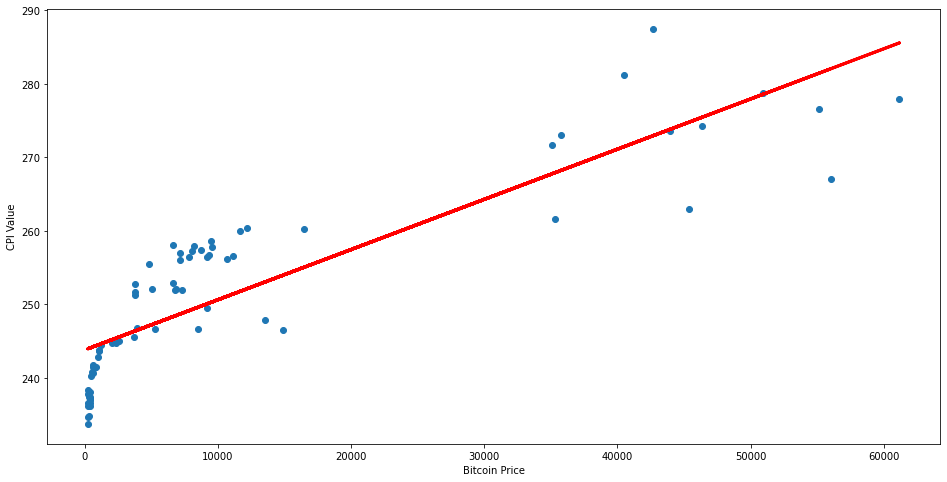

In [ ]:
# Plot regression line
regline_x = bitcoin_train
regline_y = linreg_bitcoin.intercept_ + linreg_bitcoin.coef_ * bitcoin_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(bitcoin_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("Bitcoin Price")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_bitcoin = round(linreg_bitcoin.score(bitcoin_train,cpi_train),2)

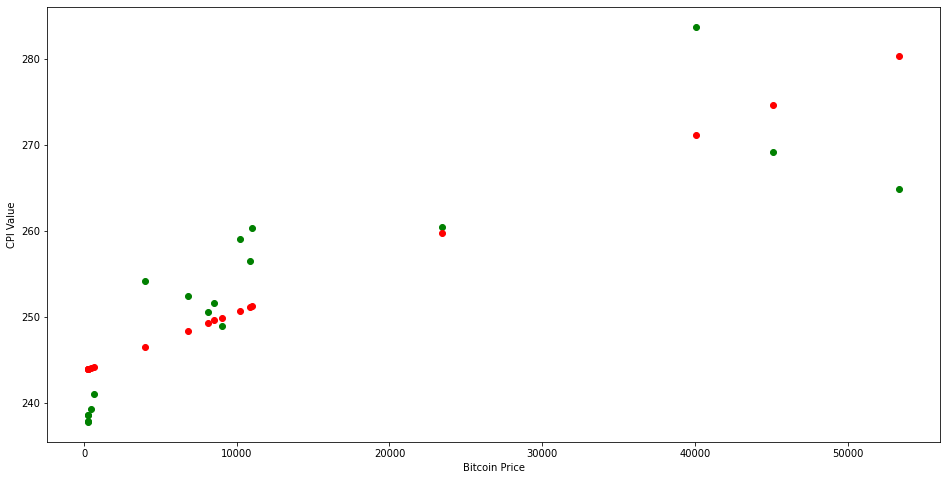

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_bitcoin.predict(bitcoin_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(bitcoin_test, cpi_test, color='green')
plt.scatter(bitcoin_test, cpi_test_pred, color='red')
plt.xlabel("Bitcoin Price")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_bitcoin = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Predicting CPI using CO2 levels in atmosphere

In [ ]:
# Import CO2 data and see the head
co2_data = pd.read_csv("co2_monthly_data.csv")

# Clean CO2 data to have date in %Y-%m format
co2_data_clean = df_dates_monthly(co2_data)


In [ ]:
# Clean CPI data to have date in %Y-%m format
cpi_data = pd.read_csv("cpi_monthly_data.csv")
cpi_data_clean = df_dates_monthly(cpi_data)

# Clean CPI data to have same time period as CO2 data
cpi_data_clean = cpi_data_clean[(cpi_data_clean.Date>='1958-03')]

In [ ]:
# Create new dataframes for reference
co2 = pd.DataFrame(co2_data_clean[['Deseasonalised CO2']])
cpi = pd.DataFrame(cpi_data_clean[['Value']])
cpi = cpi.reset_index(drop=True)

In [ ]:
co2.shape

(769, 1)

In [ ]:
cpi.shape

(769, 1)

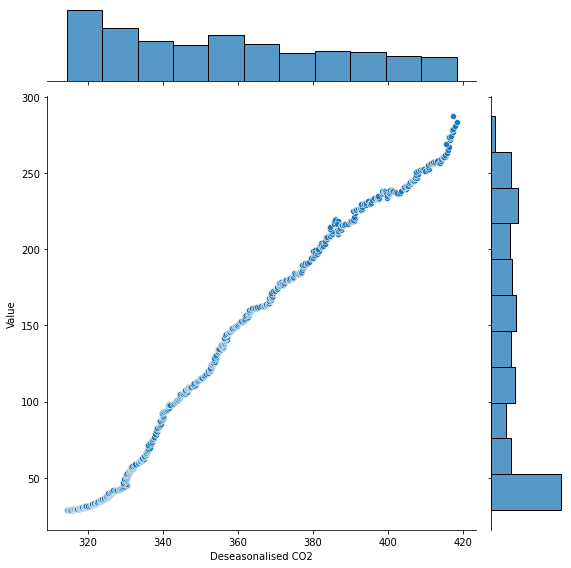

In [ ]:
# Visualise relationship between CPI and CO2 data
cpi_co2_data = pd.merge(co2,cpi,left_index=True,right_index=True)
sb.jointplot(data=cpi_co2_data, x='Deseasonalised CO2', y='Value', height = 8)

#### Preparing train and test datasets
> Total size: 769 values  
> Train set: 615 values  
> Test set: 154 values

In [ ]:
# Preparation of train and test datasets
co2_train, co2_test, cpi_train, cpi_test = train_test_split(co2,cpi,test_size=154)

In [ ]:
# Linear regression model on train set
linreg_co2 = LinearRegression()
linreg_co2.fit(co2_train,cpi_train)

LinearRegression()

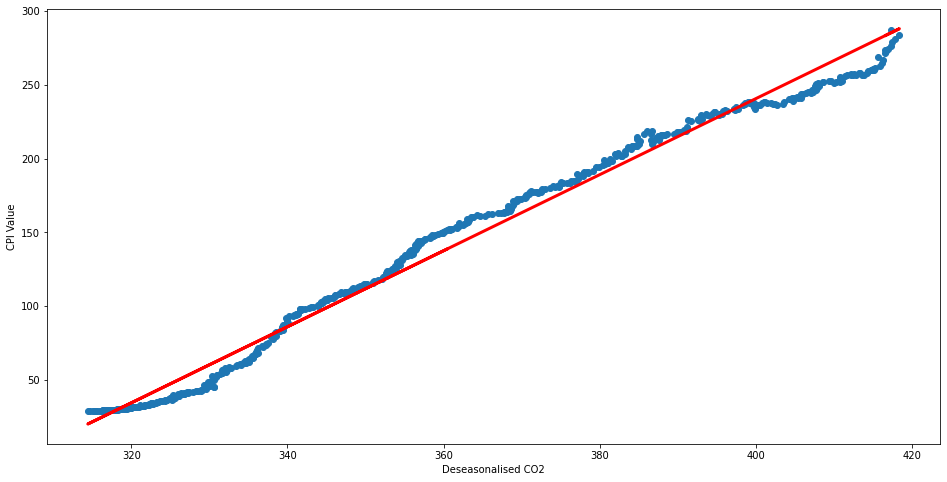

In [ ]:
# Plot regression line
regline_x = co2_train
regline_y = linreg_co2.intercept_ + linreg_co2.coef_ * co2_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(co2_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("Deseasonalised CO2")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_co2 = round(linreg_co2.score(co2_train,cpi_train),2)

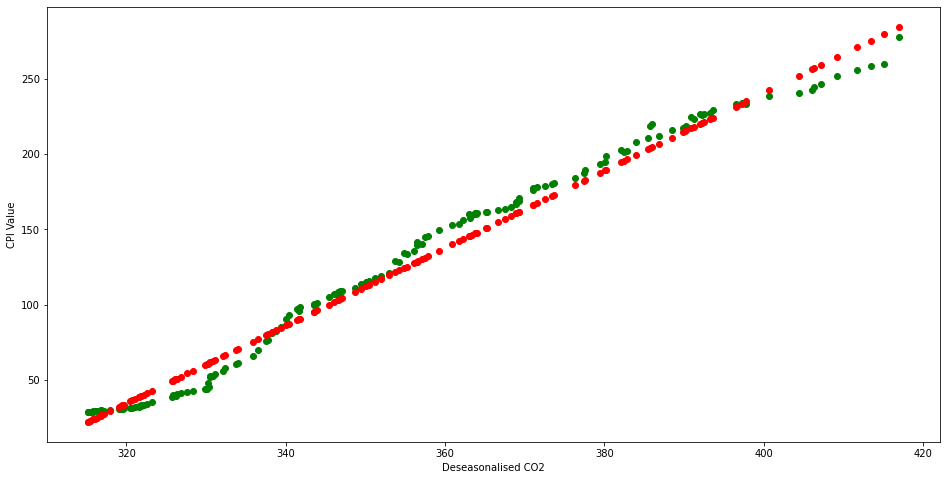

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_co2.predict(co2_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(co2_test, cpi_test, color='green')
plt.scatter(co2_test, cpi_test_pred, color='red')
plt.xlabel("Deseasonalised CO2")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_co2 = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Predicting CPI using Nominal Effective Exchange Rate (NEER) data

In [ ]:
# Import cleaned PPI and CPI data
neer_data_clean = pd.read_csv('cleaned_neer.csv')
cpi_data_clean = pd.read_csv('cleaned_cpi.csv')

In [ ]:
# Merge both datasets
neer_cpi = pd.merge(neer_data_clean, cpi_data_clean, how='inner',on='Date')
neer_cpi

,Date,Value_x,ChangePercentMonth_x,ChangePercentYear_x,Value_y,ChangePercentMonth_y,ChangePercentYear_y
0,1994-01,88.81,NaN,NaN,146.200,0.002743,0.025245
1,1994-02,88.89,0.000901,NaN,146.700,0.003420,0.025157
2,1994-03,89.52,0.007087,NaN,147.200,0.003408,0.025070
3,1994-04,90.30,0.008713,NaN,147.400,0.001359,0.023611
4,1994-05,90.27,-0.000332,NaN,147.500,0.000678,0.022885
...,...,...,...,...,...,...,...
334,2021-11,121.78,0.007946,0.008948,277.948,0.004913,0.068090
335,2021-12,122.57,0.006487,0.034084,278.802,0.003073,0.070364
336,2022-01,121.92,-0.005303,0.033133,281.148,0.008415,0.074799
337,2022-02,121.84,-0.000656,0.028272,283.716,0.009134,0.078711


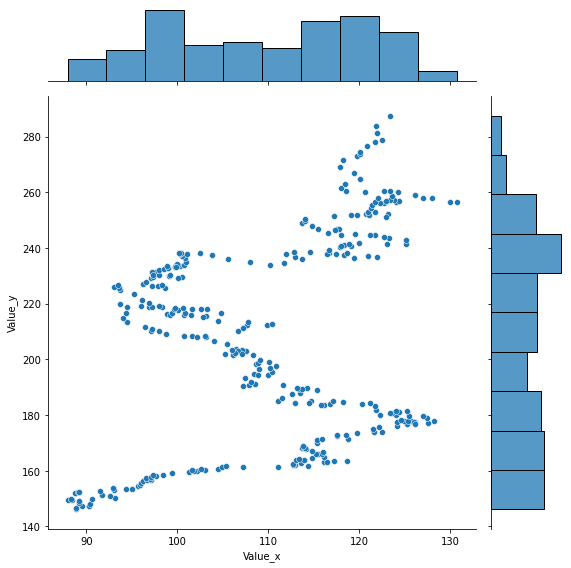

In [ ]:
# Visualise the relationship between NEER and CPI data
sb.jointplot(data=neer_cpi, x='Value_x', y='Value_y', height = 8)

#### Preparing train and test datasets
> Total size: 339 values

> Train set: 271 values

> Test set: 68 values

In [ ]:
# Preparation of train and test datasets
neer_train, neer_test, cpi_train, cpi_test = train_test_split(neer_cpi[['Value_x']],neer_cpi[['Value_y']],test_size=68)

In [ ]:
# Linear regression model on train set
linreg_neer = LinearRegression()
linreg_neer.fit(neer_train,cpi_train)

LinearRegression()

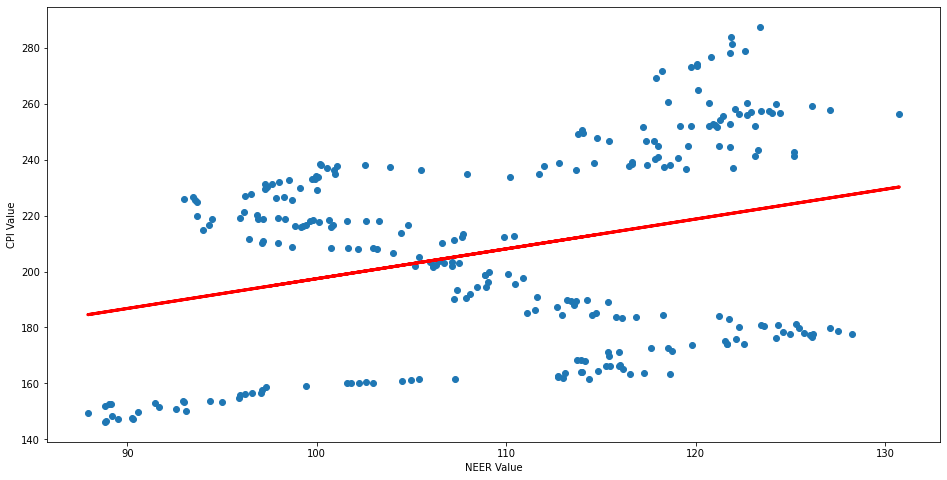

In [ ]:
# Plot regression line
regline_x = neer_train
regline_y = linreg_neer.intercept_ + linreg_neer.coef_ * neer_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(neer_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("NEER Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_neer = round(linreg_neer.score(neer_train,cpi_train),2)

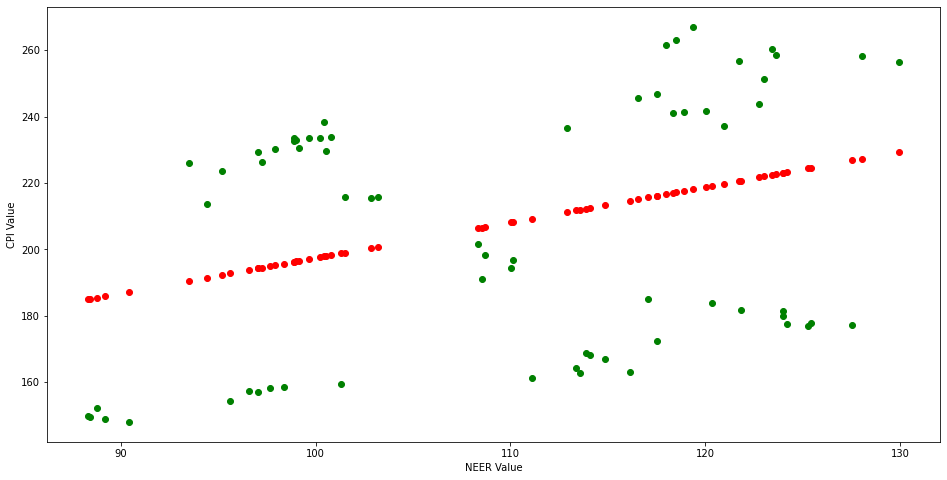

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_neer.predict(neer_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(neer_test, cpi_test, color='green')
plt.scatter(neer_test, cpi_test_pred, color='red')
plt.xlabel("NEER Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_neer = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

The trained model does not seem effective but the NEER data seems to follow a distinct pattern. Lets try to train our linear regression model on the monthly change of NEER data

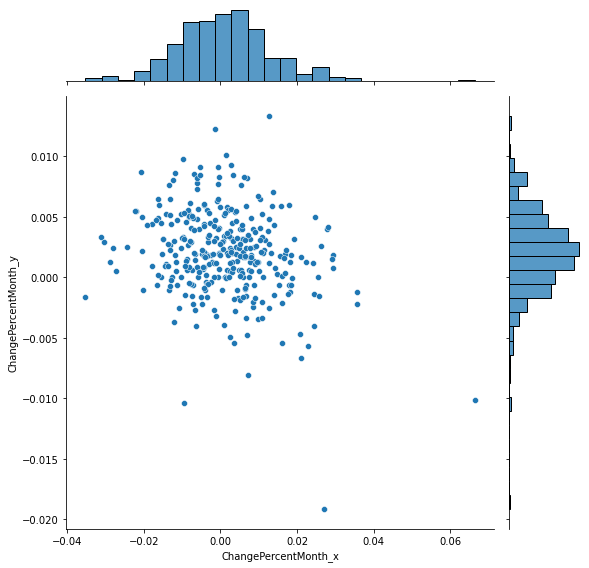

In [ ]:
# Visualise the relationship between NEER and CPI monthly change
sb.jointplot(data=neer_cpi, x='ChangePercentMonth_x', y='ChangePercentMonth_y', height = 8)

In [ ]:
# Drop rows from neer_cpi with NAN values
neer_cpi.dropna(inplace = True)
neer_cpi

,Date,Value_x,ChangePercentMonth_x,ChangePercentYear_x,Value_y,ChangePercentMonth_y,ChangePercentYear_y
12,1995-01,93.09,0.027937,0.048193,150.300,0.004008,0.028044
13,1995-02,92.57,-0.005586,0.041399,150.900,0.003992,0.028630
14,1995-03,91.67,-0.009722,0.024017,151.400,0.003313,0.028533
15,1995-04,88.82,-0.031090,-0.016390,151.900,0.003303,0.030529
16,1995-05,88.78,-0.000450,-0.016506,152.200,0.001975,0.031864
...,...,...,...,...,...,...,...
334,2021-11,121.78,0.007946,0.008948,277.948,0.004913,0.068090
335,2021-12,122.57,0.006487,0.034084,278.802,0.003073,0.070364
336,2022-01,121.92,-0.005303,0.033133,281.148,0.008415,0.074799
337,2022-02,121.84,-0.000656,0.028272,283.716,0.009134,0.078711


#### Preparing train and test datasets
> Total size: 327 values

> Train set: 262 values

> Test set: 65 values

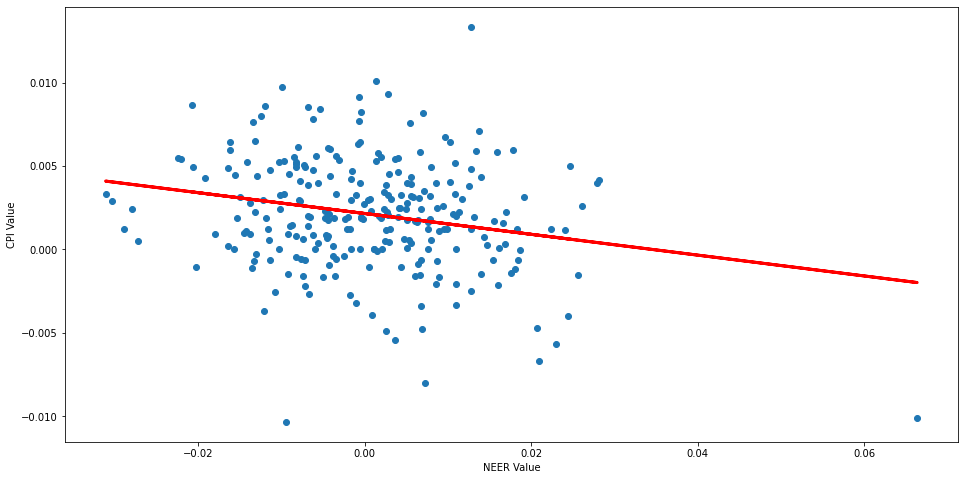

In [ ]:
# Preparation of train and test datasets
neer_train, neer_test, cpi_train, cpi_test = train_test_split(neer_cpi[['ChangePercentMonth_x']],neer_cpi[['ChangePercentMonth_y']],test_size=65)

# Linear regression model on train set
linreg_neer = LinearRegression()
linreg_neer.fit(neer_train,cpi_train)

# Plot regression line
regline_x = neer_train
regline_y = linreg_neer.intercept_ + linreg_neer.coef_ * neer_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(neer_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("NEER Value")
plt.ylabel("CPI Value")
plt.show()

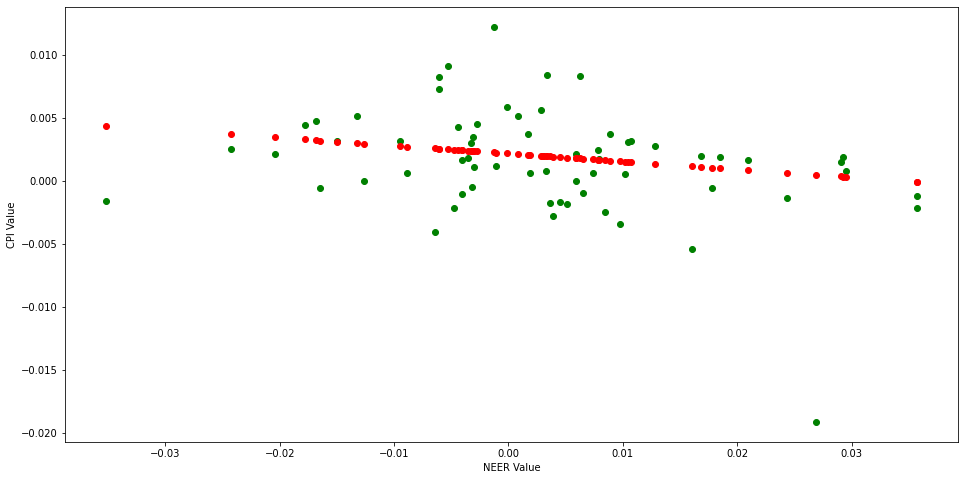

In [ ]:
# Explained variance for comparison 
ev_neer_rate = round(linreg_neer.score(neer_train,cpi_train),2)

# Use linear regression model on test set
cpi_test_pred = linreg_neer.predict(neer_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(neer_test, cpi_test, color='green')
plt.scatter(neer_test, cpi_test_pred, color='red')
plt.xlabel("NEER Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_neer_rate = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Predicting CPI using Producer Price Index (PPI) data

In [ ]:
# Import cleaned PPI and CPI data
ppi_data_clean = pd.read_csv('cleaned_ppi.csv')
cpi_data_clean = pd.read_csv('cleaned_cpi.csv')


In [ ]:
# Merge both datasets
ppi_cpi = pd.merge(ppi_data_clean, cpi_data_clean, how='inner',on='Date')
ppi_cpi

,Date,Value_x,ChangePercentMonth_x,ChangePercentYear_x,Value_y,ChangePercentMonth_y,ChangePercentYear_y
0,1913-01,12.100,NaN,NaN,9.800,NaN,NaN
1,1913-02,12.000,-0.008264,NaN,9.800,0.000000,NaN
2,1913-03,12.000,0.000000,NaN,9.800,0.000000,NaN
3,1913-04,12.000,0.000000,NaN,9.800,0.000000,NaN
4,1913-05,11.900,-0.008333,NaN,9.700,-0.010204,NaN
...,...,...,...,...,...,...,...
1306,2021-11,243.287,0.011736,0.226863,277.948,0.004913,0.068090
1307,2021-12,241.327,-0.008056,0.203626,278.802,0.003073,0.070364
1308,2022-01,246.245,0.020379,0.202368,281.148,0.008415,0.074799
1309,2022-02,253.180,0.028163,0.202184,283.716,0.009134,0.078711


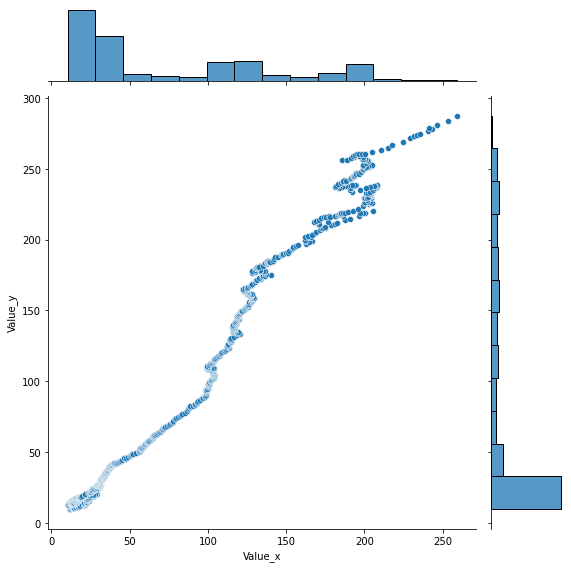

In [ ]:
# Visualise the relationship between CPI and PPI data
sb.jointplot(data=ppi_cpi, x='Value_x', y='Value_y', height = 8)

#### Preparing train and test datasets
> Total size: 1311 values  
> Train set: 1048 values  
> Test set: 263 values

In [ ]:
# Preparation of train and test datasets
ppi_train, ppi_test, cpi_train, cpi_test = train_test_split(ppi_cpi[['Value_x']],ppi_cpi[['Value_y']],test_size=263)

In [ ]:
# Linear regression model on train set
linreg_ppi = LinearRegression()
linreg_ppi.fit(ppi_train,cpi_train)

LinearRegression()

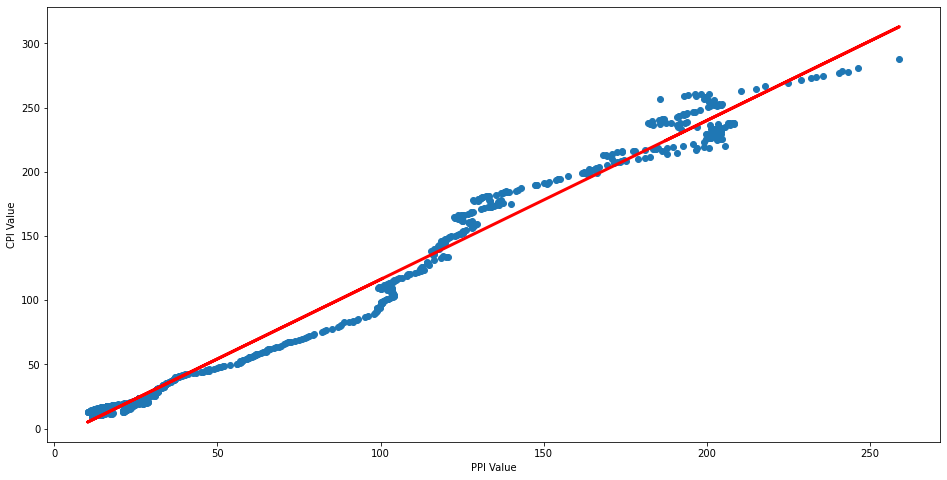

In [ ]:
# Plot regression line
regline_x = ppi_train
regline_y = linreg_ppi.intercept_ + linreg_ppi.coef_ * ppi_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(ppi_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("PPI Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_ppi = round(linreg_ppi.score(ppi_train,cpi_train),2)

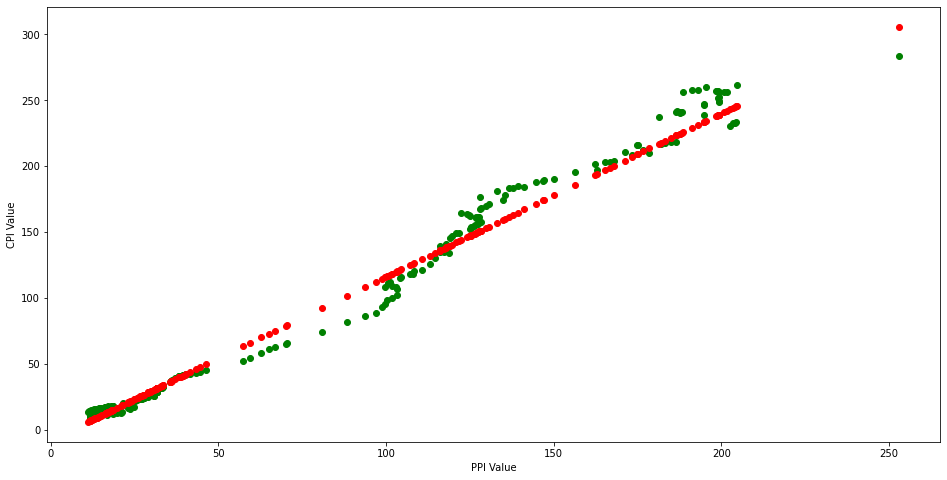

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_ppi.predict(ppi_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(ppi_test, cpi_test, color='green')
plt.scatter(ppi_test, cpi_test_pred, color='red')
plt.xlabel("PPI Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_ppi = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Predicting CPI using lagged CPI data

In [ ]:
# Import cleaned CPI data twice
cpi_lagged_data_clean = pd.read_csv('cleaned_lagged_cpi.csv')
cpi_data_clean = pd.read_csv('cleaned_cpi.csv')

In [ ]:
# Merge both datasets
lagged_cpi_cpi = pd.merge(cpi_lagged_data_clean, cpi_data_clean, how='inner',on='Date')
lagged_cpi_cpi

,Date,Value_x,ChangePercentMonth_x,ChangePercentYear_x,Value_y,ChangePercentMonth_y,ChangePercentYear_y
0,1913-02,9.800,NaN,NaN,9.800,0.000000,NaN
1,1913-03,9.800,0.000000,NaN,9.800,0.000000,NaN
2,1913-04,9.800,0.000000,NaN,9.800,0.000000,NaN
3,1913-05,9.800,0.000000,NaN,9.700,-0.010204,NaN
4,1913-06,9.700,-0.010204,NaN,9.800,0.010309,NaN
...,...,...,...,...,...,...,...
1305,2021-11,276.589,0.008308,0.062219,277.948,0.004913,0.068090
1306,2021-12,277.948,0.004913,0.068090,278.802,0.003073,0.070364
1307,2022-01,278.802,0.003073,0.070364,281.148,0.008415,0.074799
1308,2022-02,281.148,0.008415,0.074799,283.716,0.009134,0.078711


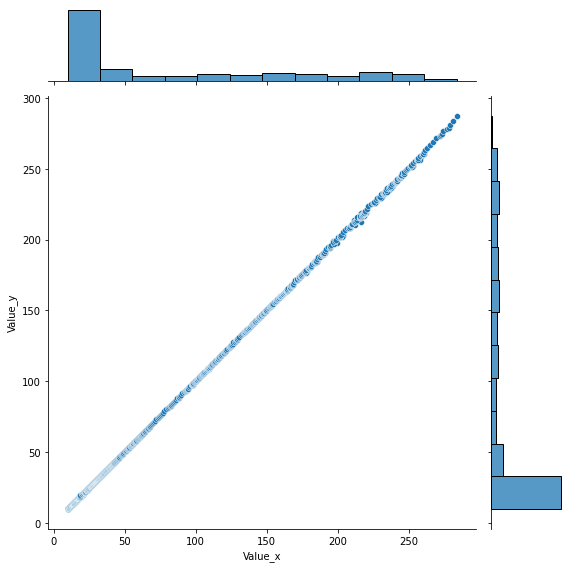

In [ ]:
# Visualise the relationship between CPI and Lagged CPI data
sb.jointplot(data=lagged_cpi_cpi, x='Value_x', y='Value_y', height = 8)

#### Preparing train and test datasets
> Total size: 1310 values  
> Train set: 1048 values  
> Test set: 262 values

In [ ]:
# Preparation of train and test datasets
laggedcpi_train, laggedcpi_test, cpi_train, cpi_test = train_test_split(lagged_cpi_cpi[['Value_x']],lagged_cpi_cpi[['Value_y']],test_size=262)

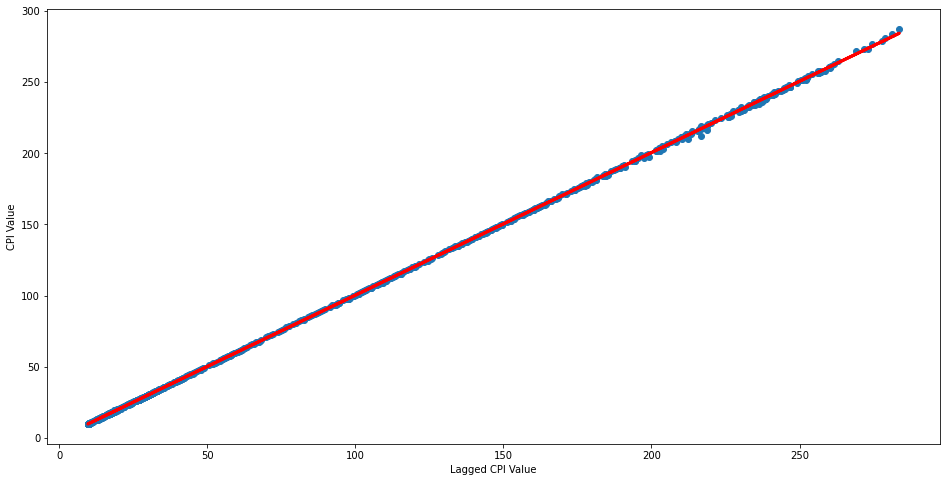

In [ ]:
# Linear regression model on train set
linreg_laggedcpi = LinearRegression()
linreg_laggedcpi.fit(laggedcpi_train,cpi_train)

# Plot regression line
regline_x = laggedcpi_train
regline_y = linreg_laggedcpi.intercept_ + linreg_laggedcpi.coef_ * laggedcpi_train

# Plot scatter plot with regression line 
f, axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(laggedcpi_train, cpi_train)
plt.plot(regline_x, regline_y, 'r-', linewidth=3)
plt.xlabel("Lagged CPI Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Explained variance for comparison 
ev_laggedcpi = round(linreg_laggedcpi.score(laggedcpi_train,cpi_train),2)

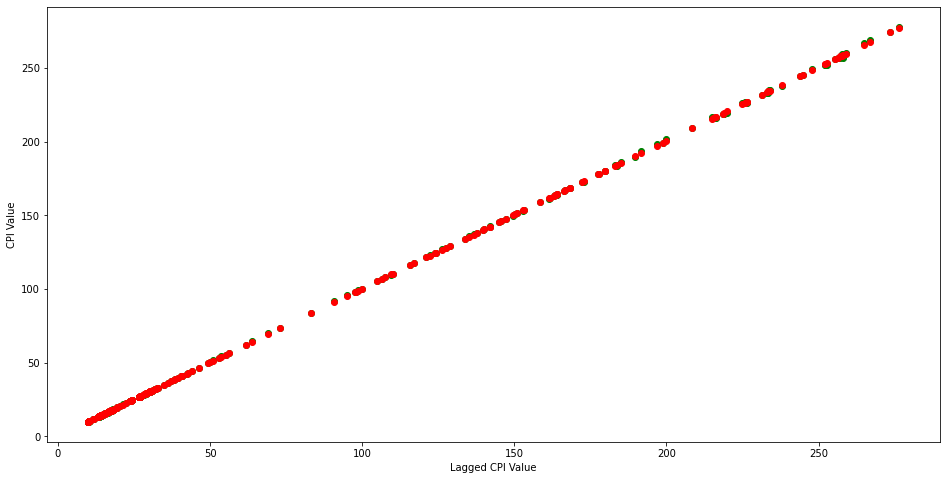

In [ ]:
# Use linear regression model on test set
cpi_test_pred = linreg_laggedcpi.predict(laggedcpi_test)

f,axes = plt.subplots(1,1,figsize=(16,8))
plt.scatter(laggedcpi_test, cpi_test, color='green')
plt.scatter(laggedcpi_test, cpi_test_pred, color='red')
plt.xlabel("Lagged CPI Value")
plt.ylabel("CPI Value")
plt.show()

In [ ]:
# Root Mean Squared Error (RMSE) for comparison
rmse_laggedcpi = round(mean_squared_error(cpi_test, cpi_test_pred, squared=False),2)

### Discussion

After generating a linear regression model to compare each variable against CPI values, we can assess the effectiveness of each variable in predicting CPI values using Explained Variance and Root Mean Square Error (RMSE). 

#### Explained Variance Comparison

Explained variance is used to assess the discrepancy between a model and the actual dataset. Higher percentages of explained variance indicates stronger association between model data and actual data, implying that a model is more accurate in predicting values based on the parameters it has been trained on.

In [ ]:
# Compare explained variance values for each model

print("Explained Variance on Train Dataset: ")
print("US Unemployment Rate: ", ev_unemp)
print("S&P 500: ", ev_sp)
print("Inflation Expectations: ", ev_bie)
print("Oil Price: ", ev_oil)
print("Bitcoin Price: ", ev_bitcoin)
print("CO2 Levels: ", ev_co2)
print("Producer Price Index (PPI): ", ev_ppi)
print("Nominal Effective Exchange Rate (NEER): ", ev_neer)
print("Nominal Effective Exchange Rate (NEER) (monthly rate change): ", ev_neer_rate)
print("Lagged CPI: ", ev_laggedcpi)

Explained Variance on Train Dataset: 
US Unemployment Rate:  0.04
S&P 500:  0.75
Inflation Expectations:  0.38
Oil Price:  0.52
Bitcoin Price:  0.75
CO2 Levels:  0.99
Producer Price Index (PPI):  0.99
Nominal Effective Exchange Rate (NEER):  0.1
Nominal Effective Exchange Rate (NEER) (monthly rate change):  0.05
Lagged CPI:  1.0


Based on the explained variance results above, we can see that Bitcoin price, CO2 levels and PPI are significantly more effective than the other factors at predicting CPI values in the train set. It is also worth noting that these Bitcoin price and CO2 levels fall within our 'cool factors' category which are non-financial metrics not conventionally used by governments and financial institutions in forecasting an inflationary environment.  
  
Linear regression on our selected variables suggests that non-conventional factors such as Bitcoin price and CO2 levels have a strong correlation with inflation and may even be more accurate in predicting inflation than some conventional financial metrics. 

#### Root Mean Squared Error Comparison

RMSE is the standard deviation of residuals in the test dataset, representing the distance between actual data points and the model regression line. A lower RMSE value in this context indicates that a factor is more accurate in predicting CPI values.

In [ ]:
# Compare RMSE values for each model

print("RMSE on Test Dataset: ")
print("US Unemployment Rate: ", rmse_unemp)
print("S&P 500: ", rmse_sp)
print("Inflation Expectations: ", rmse_bie)
print("Oil Price: ", rmse_oil)
print("Bitcoin Price: ", rmse_bitcoin)
print("CO2 Levels: ", rmse_co2)
print("Producer Price Index (PPI): ", rmse_ppi)
print("Nominal Effective Exchange Rate (NEER): ", rmse_neer)
print("Nominal Effective Exchange Rate (NEER)  (monthly rate change): ", rmse_neer_rate)
print("Lagged CPI: ", rmse_laggedcpi)

RMSE on Test Dataset: 
US Unemployment Rate:  81.71
S&P 500:  33.68
Inflation Expectations:  7.3
Oil Price:  37.69
Bitcoin Price:  6.87
CO2 Levels:  8.52
Producer Price Index (PPI):  9.64
Nominal Effective Exchange Rate (NEER):  35.59
Nominal Effective Exchange Rate (NEER)  (monthly rate change):  0.0
Lagged CPI:  0.4


Comparing the RMSE values on our models further supports our earlier results from the train dataset. Bitcoin price, CO2 levels, and PPI have the lowest RMSE values, indicating that these 3 models had the highest accuracy in predicting CPI values in the test set.   

However, despite the relative accuracy of these 3 factors as shown in our results, it must be clarified that we cannot make conclusions about the causal relationship between these factors and CPI. While there seems to be a strong correlation between these factors and CPI values, there are many economic and geopolitical variables that remain as key drivers for an inflationary environment.  
  
We believe the value of our results is in highlighting the fact that in today's highly dynamic global environment, it is imperative to consider emerging trends and their impact on the economy. Governments and financial institutions can benefit from expanding their scope of analysis to gain a more accurate prediction of inflationary pressures.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33144c3d-3954-42ed-b98f-e6671eb6d660' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>